## Predicting Prescriber induced Overdose

### DATA SCIENCE IMMERSIVE FINAL CAPE STONE

This capestone was initaited with an idea that why are so much more physicians presecribing medications that can lead to overdose. I have worked with patients for more than a year in a clinic as well as a hospital and saw significant amount of patients requesting pain relief medications again and again. I have seen people i know been affected with the chronic and life threatening overdose.

The objective of this capestone is to **identify types of prescribers that are a high-risk for opioid related fatalities and predict most influential opioids leading to deaths.**

The public health data was extracted from [CDC](https://wonder.cdc.gov/). Downloading data from wonder requires the signing f online conscent and querring the needed information separately and the system will generate the text versions and i have extracting individually for the text versions the deaths associated with opiods. I noticed some anomalies when extracting data from Wonder in large due to the system or functionality of wonder tool they have to group the needed data based on the querry.  The opiods related with Drug enforcement Agency (DEA) licensed specialities connected with the opiods were downloaded from FDA and cross matched with the 2013-2016 Opiods drusglist for the year 2013-2016 can also be accessed [here](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/OpioidMap.html). The Part D Prescriber PUF file was sas version and in texti downloaded into individual tab separated text files as dowloading the 3.2GB data at once and extracting needs significant processing power besides I noticed some anomalies when extracting data from Wonder in large due to the system or functionality of wonder tool they have to group the needed data. The otherData was extraced from CMS Medicare [Part D Opioid Prescriber Data](	https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Part-D-Prescriber.html),[cms](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/OpioidMap.html) and  [NHE](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/NationalHealthAccountsStateHealthAccountsProvider.html)

In this notebook, i am going to analyze the datasets i would use for the prediction. In particular, in this note book i will use the Exploratory Data Analysis(eda) in order to understand the statistical structure of the data. Furthermore, in the following notebooks i will build a predictive machine learning model to predict a certain target variable (prescribers) from other attributes that are linked with the features that i will learn from the eda. The datasets are collected from a real world datasets currently available  and they contains a substantial amount of missing values. In this notebook, i will try to set up  my datasets in note book 1.1 and in 1.2 i will cean all the datasets that i will use in the future and try to understand their relationships and in the next notebook. In Notebook 1.3  i will visualize the most important features and associated ones based on the data collected  that will be used for the next work. All the datasets were collected from different sources and validated. Somedatasets are official querried from respective government institutions using private usercode and adjusted to the subject after cleaning.

**Author : Kiros Gebremariam**

Cohorts of the Data Science Immersive, General Assembly @ Washington DC campus

# Data Cleaning,munging and EDA

Loadding Necessary Libraries

In [1]:
import os                                                                    # os library
import numpy as np                                                           # numpy library
import pandas as pd                                                          # pandas library
import matplotlib.pylab as plt                                               # plotting and visualization library
import seaborn as sns                                                        # plotting
import statsmodels.api as sm                                                 # for running regressions
np.random.seed(2018)                                                         # Random seed for replication 

# Configure visual settings:
plt.style.use('fivethirtyeight')
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import os                      # just ensuring the files using as working Directory(pwd)
print(os.listdir())

['.DS_Store', '.git', '.ipynb_checkpoints', '1.1. Capestone Data setup_1.ipynb', '1.2. Capestone Data Cleaning_1.ipynb', '1.3. Capestone  Data visualization_1.ipynb', '1.4. Modeling-Feature importance and  Evaluation_another model testing.ipynb', '1.4.1. Models and feature importance .ipynb', '1.5. Modeling-Feature importance and  Evaluation_another model testing.ipynb', '1.6 .Visualisation and identifying the most prescribed drug by Speciality.ipynb', '1.6. Modeling-Feature importance and  Evaluation_another model testing.ipynb', 'inputs', 'readme.md']


In [3]:
# Prescriber related datasets disaggregated by state,county,zip and rate 
pres_info_df = pd.read_csv('https://data.cms.gov/api/views/6wg9-kwip/rows.csv?accessType=DOWNLOAD')
Prescriber_state_df =pd.read_csv('./inputs/Prescriber_state.csv')  # prescribers by state
Prescriber_county_df =pd.read_csv('./inputs/Prescriber_county.csv')   # prescribers by county
Prescriber_zip_df =pd.read_csv('./inputs/Prescriber_zip.csv')       # prescribers by zip
psr_df= pd.read_csv('./inputs/prescriber_state_rate.csv')             # this is the  state wide rate of change in op prescription per 100,000 people for years 2013-2016
pcr_df = pd.read_csv('./inputs/prescriber_county_rate.csv')
pzr_df= pd.read_csv('./inputs/prescriber_zip_rate.csv')
#Drugs, Mental health and Deaths datasets different datasources
KFFMentalHealthspendState_df =pd.read_csv('./inputs/KFFMentalHealthspendState.csv')  # mental health spending by state
pop_urban_df =pd.read_csv('./inputs/pop-urban-pct-historical_cleaned_up.csv')     # urban population based on census tract of 2010
rawdataKFFopioiddeath_df = pd.read_csv('./inputs/rawdataKFFopioiddeath.csv', engine ="python")  # deaths due to opiods overdose
Wonder_Drug_Death_Data1_df = pd.read_csv('./inputs/Wonder_Drug_Death_Data_1.csv')     # drug related deaths  extracted from CDC/Wonder part1
Wonder_Drug_Death_Data2_df = pd.read_csv('./inputs/Wonder_Drug_Death_Data_2.csv')     # # drug related deaths  extracted from CDC/Wonder part2
drugs_df = pd.read_csv('./inputs/list_opioids.csv')
# crime related data both property and nonviolent
violentcrime_df =pd.read_csv('./inputs/violentcrime19992014.csv')    # violent crime extracted by querring the UCR of DOJ
propertycrime_df=pd.read_csv('./inputs/propertycrime19992014.csv')   # property crime extracted by querring the UCR of DOJ
tcrime_df =pd.read_csv('./inputs/TotalVncrime.csv')                 # total crime  by state

# National Health Expenditure from 2009-2016
NHE2016_df = pd.read_csv('./inputs/NHE2016.csv',engine='python')     # National health expenditure by state  collected from CMS

# Checking Data Integrity

# Checking data Integrity and Quality

In [4]:
pres_info_df.head()[:2]  # the data is about the Medicare part D prescriber summary extracted from cms

,NPI,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Extended-Release Opioid Claims,Extended-Release Opioid Prescribing Rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,545,23.0,4.22%,NaN,NaN
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1733,1004.0,57.93%,63.0,6.27%


Below i am going to see the top `20`,`40` and `60`  `speciality prescribers of opiods across the nation` based on the dataset from cms and the dataset has `total claims` both `opiods` and `others` and gives the opiods claims by speciality. As a matter of confidentiality i will not `focus on the name and last name` of the specailities, even though i have access to the information from cms.

In [5]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((pres_info_df.isnull().sum()/pres_info_df.shape[0]).sort_values(ascending=False) )  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
Extended-Release Opioid Prescribing Rate    0.656609
Opioid Prescribing Rate                     0.281917
Opioid Claim Count                          0.281917
Extended-Release Opioid Claims              0.113573
NPPES Provider ZIP Code                     0.000047
NPPES Provider First Name                   0.000028
NPPES Provider Last Name                    0.000028
Total Claim Count                           0.000000
Specialty Description                       0.000000
NPPES Provider State                        0.000000
NPI                                         0.000000
dtype: float64
----------------------------< For better display of the missiing values>-----------------------------


In [6]:
list(pres_info_df)

['NPI',
 'NPPES Provider Last Name',
 'NPPES Provider First Name',
 'NPPES Provider ZIP Code',
 'NPPES Provider State',
 'Specialty Description',
 'Total Claim Count',
 'Opioid Claim Count',
 'Opioid Prescribing Rate',
 'Extended-Release Opioid Claims',
 'Extended-Release Opioid Prescribing Rate']

In [7]:
print("============<Speciality description: this shows the licensed specialities count======================")
print(pres_info_df['Specialty Description'].value_counts())
print("-----------------< total instance count of speciality description>------------------------------------")

============<Speciality description: this shows the licensed specialities count======================
Nurse Practitioner                                                137822
Internal Medicine                                                 133174
Dentist                                                           129650
Family Practice                                                   109334
Physician Assistant                                                86733
Student in an Organized Health Care Education/Training Program     51615
Emergency Medicine                                                 47229
Obstetrics & Gynecology                                            29713
Optometry                                                          28570
Psychiatry                                                         25528
General Surgery                                                    22944
Orthopedic Surgery                                                 21302
Cardiovascular Disease

In [8]:
print("============<Speciality description: this shows the licensed specialities count======================")
print(pres_info_df['Specialty Description'].value_counts(normalize =True))
print("-----------------< total instance count of speciality description normalized>-------------------------")

============<Speciality description: this shows the licensed specialities count======================
Nurse Practitioner                                                1.217993e-01
Internal Medicine                                                 1.176917e-01
Dentist                                                           1.145773e-01
Family Practice                                                   9.662322e-02
Physician Assistant                                               7.664973e-02
Student in an Organized Health Care Education/Training Program    4.561442e-02
Emergency Medicine                                                4.173832e-02
Obstetrics & Gynecology                                           2.625867e-02
Optometry                                                         2.524855e-02
Psychiatry                                                        2.256021e-02
General Surgery                                                   2.027661e-02
Orthopedic Surgery           

In [9]:
pres_info_df.isnull().sum()

NPI                                              0
NPPES Provider Last Name                        32
NPPES Provider First Name                       32
NPPES Provider ZIP Code                         53
NPPES Provider State                             0
Specialty Description                            0
Total Claim Count                                0
Opioid Claim Count                          319003
Opioid Prescribing Rate                     319003
Extended-Release Opioid Claims              128514
Extended-Release Opioid Prescribing Rate    742986
dtype: int64

In [10]:
pres_info_df.fillna(0,inplace=True)

In [11]:
pres_info_df.isnull().sum().any()

False

In [12]:
pres_info_df['zipcode'] = pres_info_df['NPPES Provider ZIP Code'].fillna(0).astype('int').astype('category')

In [13]:
tmp =pres_info_df['Specialty Description'].value_counts()
misc_spec =tmp[tmp<100].index

In [14]:
misc_spec

Index(['Hospital (Dmercs Only)', 'Acupuncturist', 'Colon & Rectal Surgery',
       'Cardiac Electrophysiology', 'Physical Therapist',
       'Multispecialty Clinic/Group Practice', 'Occupational therapist',
       'Speech Language Pathologist',
       'Neuromusculoskeletal Medicine, Sports Medicine',
       'Peripheral Vascular Disease',
       ...
       'Public Health or Welfare Agency', 'Lodging',
       'Alzheimer Center (Dementia Center)', 'Prosthetic/Orthotic Supplier',
       'Perfusionist', 'Private Vehicle', 'Dental Laboratory Technician',
       'Nursing Facility, Other (Dmercs Only)', 'Clinical Laboratory',
       'Psychiatric Residential Treatment Facility'],
      dtype='object', length=128)

In [15]:
pres_info_df.describe()[:5].T

,count,mean,std,min,25%
NPI,1131550.0,1.499842e+09,2.879109e+08,1.003000e+09,1.245689e+09
NPPES Provider ZIP Code,1131550.0,4.806590e+04,3.029656e+04,0.000000e+00,2.120100e+04
Total Claim Count,1131550.0,1.308800e+03,3.147395e+03,1.100000e+01,5.400000e+01
Opioid Claim Count,1131550.0,6.906041e+01,2.708184e+02,0.000000e+00,0.000000e+00
Extended-Release Opioid Claims,1131550.0,4.757531e+00,4.409088e+01,0.000000e+00,0.000000e+00


In [16]:
pres_info_df.corr()

,NPI,NPPES Provider ZIP Code,Total Claim Count,Opioid Claim Count,Extended-Release Opioid Claims
NPI,1.000000,0.000973,-0.000598,0.001135,0.000630
NPPES Provider ZIP Code,0.000973,1.000000,-0.011660,0.019057,0.012177
Total Claim Count,-0.000598,-0.011660,1.000000,0.510209,0.200623
Opioid Claim Count,0.001135,0.019057,0.510209,1.000000,0.810273
Extended-Release Opioid Claims,0.000630,0.012177,0.200623,0.810273,1.000000


In [17]:
pres_info_df.columns

Index(['NPI', 'NPPES Provider Last Name', 'NPPES Provider First Name',
       'NPPES Provider ZIP Code', 'NPPES Provider State',
       'Specialty Description', 'Total Claim Count', 'Opioid Claim Count',
       'Opioid Prescribing Rate', 'Extended-Release Opioid Claims',
       'Extended-Release Opioid Prescribing Rate', 'zipcode'],
      dtype='object')

In [18]:
pres_info_df.dtypes

NPI                                            int64
NPPES Provider Last Name                      object
NPPES Provider First Name                     object
NPPES Provider ZIP Code                      float64
NPPES Provider State                          object
Specialty Description                         object
Total Claim Count                              int64
Opioid Claim Count                           float64
Opioid Prescribing Rate                       object
Extended-Release Opioid Claims               float64
Extended-Release Opioid Prescribing Rate      object
zipcode                                     category
dtype: object

In [19]:
tmp =pres_info_df['Opioid Claim Count'].groupby(pres_info_df['Specialty Description']).describe().unstack()
# misc =tmp.loc[pres_info_df['Total Claim Count']<10,:].index
pres_info_df=pres_info_df.loc[-pres_info_df['Specialty Description'].isin(tmp),:]
grouped_spec =pres_info_df['Opioid Claim Count'].groupby(pres_info_df['Specialty Description'])
grouped_spec_mean =grouped_spec.mean().sort_values(ascending=False)
top20=grouped_spec_mean.index[:20]
top40 = grouped_spec_mean.index[:40]
top60 =grouped_spec_mean.index[:60]

In [20]:
total_spec =pres_info_df['Total Claim Count'].groupby(pres_info_df['Specialty Description']).sum().sort_values(ascending= False)
# total_spec/total_spec.sum()

In [21]:
import pandas as pd
Prescription=pd.read_csv('./inputs/prescriber-info.csv',index_col=0, parse_dates=True)

#Reading the csv file that contains the prescriber's info

In [22]:
Prescription.head()[:2]

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1710982582,M,TX,DDS,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1245278100,F,AL,MD,General Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1


In [23]:
Prescription.shape

(25000, 255)

In [24]:
s='.'
NewColumn=list()
for i in Prescription.columns:
    NewColumn.append(i.split(s,1)[0])

# Rename the columns by eliminating periods from the original column names

Prescription.columns=NewColumn

#displaying the column names

In [25]:
print (Prescription.columns)

Index(['Gender', 'State', 'Credentials', 'Specialty', 'ABILIFY',
       'ACETAMINOPHEN', 'ACYCLOVIR', 'ADVAIR', 'AGGRENOX', 'ALENDRONATE',
       ...
       'VERAPAMIL', 'VESICARE', 'VOLTAREN', 'VYTORIN', 'WARFARIN', 'XARELTO',
       'ZETIA', 'ZIPRASIDONE', 'ZOLPIDEM', 'Opioid'],
      dtype='object', length=255)


In [26]:
# %matplotlib inline # command for plotting graphs

opName=list()

import csv
with open('./inputs/list_opioids.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        opName.append(row[0])

#creating a list and adding durg names from the fie opioids.csv

opName.pop(0)

#Removing the first element i.e. a lablel

opName

#display the list

['ABSTRAL',
 'ACETAMINOPHEN-CODEINE',
 'ACTIQ',
 'ASA-BUTALB-CAFFEINE-CODEINE',
 'ASCOMP WITH CODEINE',
 'ASPIRIN-CAFFEINE-DIHYDROCODEIN',
 'AVINZA',
 'BELLADONNA-OPIUM',
 'BUPRENORPHINE HCL',
 'BUTALB-ACETAMINOPH-CAFF-CODEIN',
 'BUTALB-CAFF-ACETAMINOPH-CODEIN',
 'BUTALBITAL COMPOUND-CODEINE',
 'BUTORPHANOL TARTRATE',
 'BUTRANS',
 'CAPITAL W-CODEINE',
 'CARISOPRODOL COMPOUND-CODEINE',
 'CARISOPRODOL-ASPIRIN-CODEINE',
 'CODEINE SULFATE',
 'CO-GESIC',
 'CONZIP',
 'DEMEROL',
 'DEMEROL',
 'DILAUDID',
 'DILAUDID',
 'DILAUDID-HP',
 'DISKETS',
 'DOLOPHINE HCL',
 'DURAGESIC',
 'DURAMORPH',
 'ENDOCET',
 'ENDODAN',
 'EXALGO',
 'FENTANYL',
 'FENTANYL CITRATE',
 'FENTORA',
 'FIORICET WITH CODEINE',
 'FIORINAL WITH CODEINE #3',
 'HYCET',
 'HYDROCODONE-ACETAMINOPHEN',
 'HYDROCODONE-IBUPROFEN',
 'HYDROMORPHONE ER',
 'HYDROMORPHONE HCL',
 'HYDROMORPHONE HCL',
 'IBUDONE',
 'INFUMORPH',
 'KADIAN',
 'LAZANDA',
 'LEVORPHANOL TARTRATE',
 'LORCET',
 'LORCET 10-650',
 'LORCET HD',
 'LORCET PLUS',
 'LORTAB',


In [27]:
Opioids=list()

#creating a new list

import re
for i in opName:
    j=re.split(' ',i)[0]
    Opioids.append(j.split('-')[0])
    
#Selecting the first element from every drug in the opName list

print(Opioids)

#Display the list

['ABSTRAL', 'ACETAMINOPHEN', 'ACTIQ', 'ASA', 'ASCOMP', 'ASPIRIN', 'AVINZA', 'BELLADONNA', 'BUPRENORPHINE', 'BUTALB', 'BUTALB', 'BUTALBITAL', 'BUTORPHANOL', 'BUTRANS', 'CAPITAL', 'CARISOPRODOL', 'CARISOPRODOL', 'CODEINE', 'CO', 'CONZIP', 'DEMEROL', 'DEMEROL', 'DILAUDID', 'DILAUDID', 'DILAUDID', 'DISKETS', 'DOLOPHINE', 'DURAGESIC', 'DURAMORPH', 'ENDOCET', 'ENDODAN', 'EXALGO', 'FENTANYL', 'FENTANYL', 'FENTORA', 'FIORICET', 'FIORINAL', 'HYCET', 'HYDROCODONE', 'HYDROCODONE', 'HYDROMORPHONE', 'HYDROMORPHONE', 'HYDROMORPHONE', 'IBUDONE', 'INFUMORPH', 'KADIAN', 'LAZANDA', 'LEVORPHANOL', 'LORCET', 'LORCET', 'LORCET', 'LORCET', 'LORTAB', 'MAGNACET', 'MEPERIDINE', 'MEPERIDINE', 'MEPERITAB', 'METHADONE', 'METHADONE', 'METHADOSE', 'MORPHINE', 'MORPHINE', 'MORPHINE', 'MS', 'NALBUPHINE', 'NORCO', 'NUCYNTA', 'NUCYNTA', 'OPANA', 'OPANA', 'OPIUM', 'OXECTA', 'OXYCODONE', 'OXYCODONE', 'OXYCODONE', 'OXYCODONE', 'OXYCODONE', 'OXYCONTIN', 'OXYMORPHONE', 'OXYMORPHONE', 'PENTAZOCINE', 'PENTAZOCINE', 'PERCOCET'

In [28]:
RemoveCol=list()

#Creating a list

for Pcol in Prescription.columns[4:254]:
    if Pcol not in Opioids:
        RemoveCol.append(Pcol)

# Adding the drug names in the list which are not opioid drugs

len(RemoveCol)

#Displaying the number of drigs that are not an opioid drug

238

In [29]:
Prescription_opioid=Prescription.drop(RemoveCol, axis=1)

#Removing the column of drug names that are not opioids because they are not relevant to be considered

Prescription_opioid = Prescription_opioid[Prescription_opioid.Opioid == 1]

#Selecting a subset that has entries for which the prsecriber or specialist prescribed opioids
# all pysicians are not entitled to prescribe abd those who will prescribe will get NPI from FDA as well as the DEA

Prescription_opioid.head()[:5]

#Displaying the subset as follows of sepecialists that are entitled  to prescribe  the listed opiods by the DEA

,Gender,State,Credentials,Specialty,ACETAMINOPHEN,CARISOPRODOL,FENTANYL,HYDROCODONE,HYDROMORPHONE,METHADONE,MORPHINE,MORPHINE,OXYCODONE,OXYCODONE,OXYCONTIN,TRAMADOL,Opioid
NPI,,,,,,,,,,,,,,,,,
1710982582,M,TX,DDS,Dentist,0,0,0,17,0,0,0,0,0,0,0,0,1
1245278100,F,AL,MD,General Surgery,0,45,0,182,0,0,0,24,33,87,0,36,1
1669567541,M,AZ,MD,Internal Medicine,43,0,0,0,0,0,22,146,229,29,0,90,1
1679650949,M,NV,M.D.,Hematology/Oncology,0,0,22,22,0,0,0,0,0,22,0,0,1
1548580897,M,PA,DO,General Surgery,0,0,0,0,0,0,0,0,25,0,0,0,1


In [30]:
Prescription_notopioid = Prescription[Prescription.Opioid == 0]

#Selecting a subset that has entries for which the prsecriber did not prescribed opioids

Prescription_notopioid.head()[:5]

# Displaying the subset

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN,ACYCLOVIR,ADVAIR,AGGRENOX,ALENDRONATE,...,VERAPAMIL,VESICARE,VOLTAREN,VYTORIN,WARFARIN,XARELTO,ZETIA,ZIPRASIDONE,ZOLPIDEM,Opioid
NPI,,,,,,,,,,,,,,,,,,,,,
1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
1407113988,F,PA,"RN, MSN, ANP-BC",Nurse Practitioner,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1023260569,M,TX,O.D.,Optometry,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1548275050,M,OH,MD,Cardiology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1356388011,F,MA,M.D.,Internal Medicine,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,0


In [31]:
len(Prescription_opioid)

#The number of entries pertaining to the prescriber specialist prescribing opioids across all the 52 states and
# other US locations including military facilities that people are entitled to get the medications from the  center for 
# medical services.

14688

In [32]:
len(Prescription_notopioid)

#The number of entries pertaining to the specialist or prescriber not entitled to prescribing opioids by the DEA and
# these pysicians or specialists are not entitled to prescribe any opiods for the patient for the maximum 84 days
# according to the DEA and FDA narcotics control and prescription guidelines

10312

In [33]:
Prescription= Prescription_opioid

#Make a copy of the Prescription_opioid dataframe which will help to work on little data

In [34]:
Prescription['Credentials'] = Prescription['Credentials'].str.replace('[^\w\s]','')
Prescription['Credentials']=Prescription['Credentials'].str.replace(' ','')
Prescription['Credentials']

#Cleaning the Speciality column in the dataframe by removing the punctuations as some have white spaces

NPI
1710982582             DDS
1245278100              MD
1669567541              MD
1679650949              MD
1548580897              DO
1437192002              MD
1821106832              MD
1609931914              MD
1659334472              MD
1144205303              MD
1952598419              MD
1780661793              MD
1548238389              MD
1366582587             DDS
1083907059              MD
1598748931              MD
1063566727             DPM
1629394754              MD
1174555080              MD
1871548537              MD
1841349677       MSNAPRNBC
1629038443              MD
1386607315              DO
1295852101              MD
1467448381             PAC
1285675637              MD
1679630891    DNPAPRNBCFNP
1346496197              MD
1922136613             DDS
1235426800            CRNP
                  ...     
1669782355             DMD
1689618753              MD
1376836916             DPM
1407898505              MD
1679914113            APRN
1871541482              

In [35]:
Prescription
df=Prescription

#Make a copy of the Prescription dataframe

In [36]:
df['Total_Opioids']=pd.DataFrame({'Total_Opioids': [] })

#Adding a new column that shows the total opiods prescribed by the specialists who are entitled to practice
df['Total_Opioids'][:5]

NPI
1710982582   NaN
1245278100   NaN
1669567541   NaN
1679650949   NaN
1548580897   NaN
Name: Total_Opioids, dtype: float64

In [37]:
b=list()
for i in range(0, len(df)):
    a=list(df.iloc[i,4:16])
    df.iloc[i,17]=sum(a)

#Adding number of opioids prescribed by the Speciality for any opioid drugs 
# and assigning it to the new variable 'Total opioids' so that it will be easy 
# to work on with out refering back to the  previous version of the Dataframe

In [38]:
df #Displaying the dataframe

,Gender,State,Credentials,Specialty,ACETAMINOPHEN,CARISOPRODOL,FENTANYL,HYDROCODONE,HYDROMORPHONE,METHADONE,MORPHINE,MORPHINE,OXYCODONE,OXYCODONE,OXYCONTIN,TRAMADOL,Opioid,Total_Opioids
NPI,,,,,,,,,,,,,,,,,,
1710982582,M,TX,DDS,Dentist,0,0,0,17,0,0,0,0,0,0,0,0,1,17.0
1245278100,F,AL,MD,General Surgery,0,45,0,182,0,0,0,24,33,87,0,36,1,407.0
1669567541,M,AZ,MD,Internal Medicine,43,0,0,0,0,0,22,146,229,29,0,90,1,559.0
1679650949,M,NV,MD,Hematology/Oncology,0,0,22,22,0,0,0,0,0,22,0,0,1,66.0
1548580897,M,PA,DO,General Surgery,0,0,0,0,0,0,0,0,25,0,0,0,1,25.0
1437192002,M,NH,MD,Family Practice,0,0,0,24,0,0,0,0,30,21,0,15,1,90.0
1821106832,F,WI,MD,Internal Medicine,0,0,25,0,0,0,0,0,0,11,0,28,1,64.0
1609931914,F,PR,MD,General Practice,0,0,0,0,0,0,0,0,0,0,0,71,1,71.0
1659334472,M,TX,MD,General Surgery,0,0,0,17,0,0,0,0,0,0,0,0,1,17.0


In [39]:
# df.to_csv('./inputs/TotalOpioidsvisualization.csv')

In [40]:
clean_df = pd.read_csv('./inputs/prescribers_clean832.csv')

In [41]:
clean_df.head()[:2]  # the total deaths by state merged with the opiods by speciality

,Unnamed: 0,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY,State_ZZ
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,134,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
clean_df.drop(['Unnamed: 0'], axis =1, inplace =True)

In [43]:
clean_df.shape

(24237, 354)

In [44]:
#  extracted from from CMS Medicare Part D Opioid Prescribing Geographic 2013-2016 Excel file and 
# created CSV files for the three taps 1) state 2) county and 3) zip
# Stored presciber-state file in a variable(df2)
Prescriber_state_df.fillna('National')[:2]   # the data is about the prescriber/Physician_Locator

,State_Name,State_Abbreviation,State_FIPS,2013_Part_ D_Prescribers,2013_Part_Opioid_Prescribers,2013_Opioid Claims,2013_Extended_Release_Opioid_Claims,2013_Overall_Claims,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,...,2016_Part D Opioid Prescribers,2016_Opioid Claims,2016_Extended Release Opioid Claims,2016_Overall_Claims,2016_Opioid_Prescribing_Rate,2016_Extended_Release_Opioid_Prescribing_ Rate,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate,2013_2015_Change_in_Opioid_Prescribing_Rate,2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate
0,National,National,National,"1,037,770","491,500","78,045,683","4,773,286","1,342,096,654",5.82,6.12,...,496350,77716608,5381275,1452978228,5.34,6.92,-0.47,0.80,-0.30,0.59
1,Alabama,AL,1,"12,820","7,422","2,260,284","118,523","29,160,952",7.75,5.24,...,"7,004","2,156,504","120,579","28,882,148",7.47,5.59,-0.28,0.35,-0.21,0.31


In [45]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((Prescriber_state_df.isnull().sum()/Prescriber_state_df.shape[0]).sort_values(ascending=False) )  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
State_Abbreviation                                               0.019231
State_FIPS                                                       0.019231
2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate     0.000000
2013_Extended_Release_Opioid_Prescribing_Rate                    0.000000
2014_Overall_Claims                                              0.000000
2014_Extended_Release_Opioid_Claims                              0.000000
2014_Opioid_Claims                                               0.000000
2014_Part D_Opioid_Prescribers                                   0.000000
2014_Part_ D_Prescribers                                         0.000000
2013_Overall_Claims                                              0.000000
2013_Opioid_Prescribing_Rate                                     0.000000
2014_Extended_Release_Opioid_Prescribing_Rate                    0.000000
2013_Exten

In [46]:
# here just filling the NaN value due to the columns mismatach as there is no need fo data on 
# state abrevation and state state FIPs
Prescriber_state_df.fillna("National")[:5] 

,State_Name,State_Abbreviation,State_FIPS,2013_Part_ D_Prescribers,2013_Part_Opioid_Prescribers,2013_Opioid Claims,2013_Extended_Release_Opioid_Claims,2013_Overall_Claims,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,...,2016_Part D Opioid Prescribers,2016_Opioid Claims,2016_Extended Release Opioid Claims,2016_Overall_Claims,2016_Opioid_Prescribing_Rate,2016_Extended_Release_Opioid_Prescribing_ Rate,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate,2013_2015_Change_in_Opioid_Prescribing_Rate,2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate
0,National,National,National,"1,037,770","491,500","78,045,683","4,773,286","1,342,096,654",5.82,6.12,...,496350,77716608,5381275,1452978228,5.34,6.92,-0.47,0.80,-0.30,0.59
1,Alabama,AL,1,"12,820","7,422","2,260,284","118,523","29,160,952",7.75,5.24,...,"7,004","2,156,504","120,579","28,882,148",7.47,5.59,-0.28,0.35,-0.21,0.31
2,Alaska,AK,2,"2,275","1,099","86,517","8,602","1,281,057",6.75,9.94,...,"1,043","82,557","9,074","1,225,327",6.74,10.99,-0.01,1.05,-0.09,0.71
3,Arizona,AZ,4,"20,542","10,510","1,545,138","151,086","22,126,421",6.98,9.78,...,"11,026","1,621,223","173,171","24,891,001",6.51,10.68,-0.47,0.90,-0.20,0.48
4,Arkansas,AR,5,"7,909","4,700","1,128,356","57,519","16,759,116",6.73,5.10,...,"4,854","1,155,171","65,819","18,139,502",6.37,5.70,-0.36,0.60,-0.36,0.49


In [47]:
list(Prescriber_state_df)

['State_Name',
 'State_Abbreviation',
 'State_FIPS',
 '2013_Part_ D_Prescribers',
 '2013_Part_Opioid_Prescribers',
 '2013_Opioid Claims',
 '2013_Extended_Release_Opioid_Claims',
 '2013_Overall_Claims',
 '2013_Opioid_Prescribing_Rate',
 '2013_Extended_Release_Opioid_Prescribing_Rate',
 '2014_Part_ D_Prescribers',
 '2014_Part D_Opioid_Prescribers',
 '2014_Opioid_Claims',
 '2014_Extended_Release_Opioid_Claims',
 '2014_Overall_Claims',
 '2014_Opioid_Prescribing_Rate',
 '2014_Extended_Release_Opioid_Prescribing_Rate',
 '2015_Part D Prescribers',
 '2015_Part D Opioid Prescribers',
 '2015_Opioid Claims',
 '2015_Extended Release Opioid Claims',
 '2015_Overall_Claims',
 '2015_Opioid_Prescribing_Rate',
 '2015_Extended_Release_Opioid_Prescribing_ Rate',
 '2016_Part D Prescribers',
 '2016_Part D Opioid Prescribers',
 '2016_Opioid Claims',
 '2016_Extended Release Opioid Claims',
 '2016_Overall_Claims',
 '2016_Opioid_Prescribing_Rate',
 '2016_Extended_Release_Opioid_Prescribing_ Rate',
 '2013_2016_C

In [48]:
#Selected the opioid prescribe rate columsn for years 2013-2016 by prescriber state(psr)
# this was extracted from df2 so that it will be important to see for features in the next stages
psr_df.head()[:2]
psr_df.fillna("National")[:2]

,State_Name,State_Abbreviation,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,2014_Opioid_Prescribing_Rate,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2016_Opioid_Prescribing_Rate,2016_Extended_Release_Opioid_Prescribing_ Rate,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate
0,National,National,5.82,6.12,5.74,6.27,5.52,6.71,5.34,6.92,-0.47,0.80
1,Alabama,AL,7.75,5.24,7.86,5.24,7.54,5.55,7.47,5.59,-0.28,0.35


In [49]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((psr_df.isnull().sum()/psr_df.shape[0]).sort_values(ascending=False))  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
State_Abbreviation                                               0.019231
2013_2016_Change in Extended Release Opioid Prescribing Rate     0.000000
2013_2016_Change in Opioid Prescribing Rate                      0.000000
2016_Extended_Release_Opioid_Prescribing_ Rate                   0.000000
2016_Opioid_Prescribing_Rate                                     0.000000
2015_Extended_Release_Opioid_Prescribing_ Rate                   0.000000
2015_Opioid_Prescribing_Rate                                     0.000000
2014_Extended_Release_Opioid_Prescribing_Rate                    0.000000
2014_Opioid_Prescribing_Rate                                     0.000000
2013_Extended_Release_Opioid_Prescribing_Rate                    0.000000
2013_Opioid_Prescribing_Rate                                     0.000000
State_Name                                                       0.000000
dtype: flo

In [50]:
psr_df.fillna("National")
psr_df.head()[:2]

,State_Name,State_Abbreviation,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,2014_Opioid_Prescribing_Rate,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2016_Opioid_Prescribing_Rate,2016_Extended_Release_Opioid_Prescribing_ Rate,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate
0,National,NaN,5.82,6.12,5.74,6.27,5.52,6.71,5.34,6.92,-0.47,0.80
1,Alabama,AL,7.75,5.24,7.86,5.24,7.54,5.55,7.47,5.59,-0.28,0.35


In [51]:
psr_changeex_df = psr_df[['State_Name','2013_2016_Change in Opioid Prescribing Rate', '2013_2016_Change in Extended Release Opioid Prescribing Rate ']]
psr_changeex_df .head()[:2]

,State_Name,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate
0,National,-0.47,0.80
1,Alabama,-0.28,0.35


In [52]:
#Selected the opioid prescribe rate columsn for years 2013-2016 by prescriber county
# pcr_df.head()[:2]
psr_df.fillna("National")[:2]

,State_Name,State_Abbreviation,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,2014_Opioid_Prescribing_Rate,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2016_Opioid_Prescribing_Rate,2016_Extended_Release_Opioid_Prescribing_ Rate,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate
0,National,National,5.82,6.12,5.74,6.27,5.52,6.71,5.34,6.92,-0.47,0.80
1,Alabama,AL,7.75,5.24,7.86,5.24,7.54,5.55,7.47,5.59,-0.28,0.35


In [53]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((pcr_df.isnull().sum()/pcr_df.shape[0]).sort_values(ascending=False)  )  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
2013_2016_Change in Extended Release Opioid Prescribing Rate     0.005509
2013_2016_Change in Opioid Prescribing Rate                      0.005509
2015_Extended_Release_Opioid_Prescribing_ Rate                   0.002592
2015_Opioid_Prescribing_Rate                                     0.002592
2016_Extended_Release_Opioid_Prescribing_ Rate                   0.002268
2016_Opioid_Prescribing_Rate                                     0.002268
2014_Extended_Release_Opioid_Prescribing_Rate                    0.001944
2014_Opioid_Prescribing_Rate                                     0.001944
2013_Extended_Release_Opioid_Prescribing_Rate                    0.001944
2013_Opioid_Prescribing_Rate                                     0.001944
State_FIPS                                                       0.000324
County Name                                                      0.000324
State_Abbr

In [54]:
pcr_df.fillna("National")[:2]
# pcr_df.head()[:2]

,State_Name,State_Abbreviation,County Name,State_FIPS,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,2014_Opioid_Prescribing_Rate,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2016_Opioid_Prescribing_Rate,2016_Extended_Release_Opioid_Prescribing_ Rate,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate
0,National,National,National,National,5.82,6.12,5.74,6.27,5.52,6.71,5.34,6.92,-0.47,0.8
1,Alabama,AL,Autauga,1001,9.8,4.78,9.72,5.85,8.07,7.24,11.47,9.39,1.67,4.61


In [55]:
list(pcr_df)

['State_Name',
 'State_Abbreviation',
 'County Name',
 'State_FIPS',
 '2013_Opioid_Prescribing_Rate',
 '2013_Extended_Release_Opioid_Prescribing_Rate',
 '2014_Opioid_Prescribing_Rate',
 '2014_Extended_Release_Opioid_Prescribing_Rate',
 '2015_Opioid_Prescribing_Rate',
 '2015_Extended_Release_Opioid_Prescribing_ Rate',
 '2016_Opioid_Prescribing_Rate',
 '2016_Extended_Release_Opioid_Prescribing_ Rate',
 '2013_2016_Change in Opioid Prescribing Rate',
 '2013_2016_Change in Extended Release Opioid Prescribing Rate ']

In [56]:
pcr_changeex_df = pcr_df[['State_Name','2013_2016_Change in Opioid Prescribing Rate', '2013_2016_Change in Extended Release Opioid Prescribing Rate ']]
pcr_changeex_df .head()[:2]

,State_Name,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate
0,National,-0.47,0.80
1,Alabama,1.67,4.61


In [57]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((Prescriber_county_df.isnull().sum()/Prescriber_county_df.shape[0]).sort_values(ascending=False)   )  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate     0.004537
2013_2015_Change_in_Opioid_Prescribing_Rate                      0.004537
2015_Extended_Release_Opioid_Prescribing_ Rate                   0.002592
2015_Opioid_Prescribing_Rate                                     0.002592
2015_Overall_Claims                                              0.002592
2015_Extended Release Opioid Claims                              0.002592
2015_Opioid Claims                                               0.002592
2015_Part D Opioid Prescribers                                   0.002592
2015_Part D Prescribers                                          0.002592
2013_Extended_Release_Opioid_Prescribing_Rate                    0.001944
2013_Part_ D_Prescribers                                         0.001944
2013_Part_Opioid_Prescribers                                     0.001944
2013_Opioi

In [58]:
list(Prescriber_county_df)

['State_Name',
 'State_Abbreviation',
 'County Name',
 'State_FIPS',
 '2013_Part_ D_Prescribers',
 '2013_Part_Opioid_Prescribers',
 '2013_Opioid Claims',
 '2013_Extended_Release_Opioid_Claims',
 '2013_Overall_Claims',
 '2013_Opioid_Prescribing_Rate',
 '2013_Extended_Release_Opioid_Prescribing_Rate',
 '2014_Part_ D_Prescribers',
 '2014_Part D_Opioid_Prescribers',
 '2014_Opioid_Claims',
 '2014_Extended_Release_Opioid_Claims',
 '2014_Overall_Claims',
 '2014_Opioid_Prescribing_Rate',
 '2014_Extended_Release_Opioid_Prescribing_Rate',
 '2015_Part D Prescribers',
 '2015_Part D Opioid Prescribers',
 '2015_Opioid Claims',
 '2015_Extended Release Opioid Claims',
 '2015_Overall_Claims',
 '2015_Opioid_Prescribing_Rate',
 '2015_Extended_Release_Opioid_Prescribing_ Rate',
 '2013_2015_Change_in_Opioid_Prescribing_Rate',
 '2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate ']

In [59]:
Prescriber_county_df.head()[:2]

,State_Name,State_Abbreviation,County Name,State_FIPS,2013_Part_ D_Prescribers,2013_Part_Opioid_Prescribers,2013_Opioid Claims,2013_Extended_Release_Opioid_Claims,2013_Overall_Claims,2013_Opioid_Prescribing_Rate,...,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Part D Prescribers,2015_Part D Opioid Prescribers,2015_Opioid Claims,2015_Extended Release Opioid Claims,2015_Overall_Claims,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2013_2015_Change_in_Opioid_Prescribing_Rate,2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate
0,National,NaN,NaN,NaN,"1,037,770","491,500","78,045,683","4,773,286","1,342,096,654",5.82,...,6.27,"1,090,979","496,383","78,372,855","5,257,481","1,418,618,875",5.52,6.71,-0.30,0.59
1,Alabama,AL,Autauga,1001.0,67,44,"20,482",979,"208,936",9.80,...,5.85,68,43,"15,998","1,159","198,347",8.07,7.24,-1.73,2.46


In [60]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((Prescriber_county_df.isnull().sum()/Prescriber_county_df.shape[0]).sort_values(ascending=False))  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate     0.004537
2013_2015_Change_in_Opioid_Prescribing_Rate                      0.004537
2015_Extended_Release_Opioid_Prescribing_ Rate                   0.002592
2015_Opioid_Prescribing_Rate                                     0.002592
2015_Overall_Claims                                              0.002592
2015_Extended Release Opioid Claims                              0.002592
2015_Opioid Claims                                               0.002592
2015_Part D Opioid Prescribers                                   0.002592
2015_Part D Prescribers                                          0.002592
2013_Extended_Release_Opioid_Prescribing_Rate                    0.001944
2013_Part_ D_Prescribers                                         0.001944
2013_Part_Opioid_Prescribers                                     0.001944
2013_Opioi

In [61]:
list(Prescriber_county_df)   # this list is for prescriber county information based on cms datasets

['State_Name',
 'State_Abbreviation',
 'County Name',
 'State_FIPS',
 '2013_Part_ D_Prescribers',
 '2013_Part_Opioid_Prescribers',
 '2013_Opioid Claims',
 '2013_Extended_Release_Opioid_Claims',
 '2013_Overall_Claims',
 '2013_Opioid_Prescribing_Rate',
 '2013_Extended_Release_Opioid_Prescribing_Rate',
 '2014_Part_ D_Prescribers',
 '2014_Part D_Opioid_Prescribers',
 '2014_Opioid_Claims',
 '2014_Extended_Release_Opioid_Claims',
 '2014_Overall_Claims',
 '2014_Opioid_Prescribing_Rate',
 '2014_Extended_Release_Opioid_Prescribing_Rate',
 '2015_Part D Prescribers',
 '2015_Part D Opioid Prescribers',
 '2015_Opioid Claims',
 '2015_Extended Release Opioid Claims',
 '2015_Overall_Claims',
 '2015_Opioid_Prescribing_Rate',
 '2015_Extended_Release_Opioid_Prescribing_ Rate',
 '2013_2015_Change_in_Opioid_Prescribing_Rate',
 '2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate ']

In [62]:
Prescriber_zip_df.head()[:2] # this is the dataset for the prescriber zip which is one of the dataclassifications by cms

,State_Name,State_Abbreviation,State_FIPS,2013_Part_ D_Prescribers,2013_Part_Opioid_Prescribers,2013_Opioid Claims,2013_Extended_Release_Opioid_Claims,2013_Overall_Claims,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,...,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Part D Prescribers,2015_Part D Opioid Prescribers,2015_Opioid Claims,2015_Extended Release Opioid Claims,2015_Overall_Claims,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2013_2015_Change_in_Opioid_Prescribing_Rate,2013_2015_Change_in_Extended_Release_Opioid_Prescribing_Rate
0,National,NaN,NaN,"1,037,770","491,500","78,045,683","4,773,286","1,342,096,654",5.82,6.12,...,6.27,"1,090,979","496,383","78,372,855","5,257,481","1,418,618,875",5.52,6.71,-0.30,0.59
1,Alabama,AL,35004.0,18,9,"1,340",19,"18,632",7.19,1.42,...,6.30,17,7,"1,340",39,"16,830",7.96,2.91,0.77,1.49


In [63]:
#Selected the opioid prescribe rate columsn for years 2013-2016 by prescriber county_rate
# pcr_df.head()[:2]
pcr_df.fillna("National")[:2]

,State_Name,State_Abbreviation,County Name,State_FIPS,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,2014_Opioid_Prescribing_Rate,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2016_Opioid_Prescribing_Rate,2016_Extended_Release_Opioid_Prescribing_ Rate,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate
0,National,National,National,National,5.82,6.12,5.74,6.27,5.52,6.71,5.34,6.92,-0.47,0.8
1,Alabama,AL,Autauga,1001,9.8,4.78,9.72,5.85,8.07,7.24,11.47,9.39,1.67,4.61


In [64]:
pcr_changeex_df = pcr_df[['State_Name','2013_2016_Change in Opioid Prescribing Rate', '2013_2016_Change in Extended Release Opioid Prescribing Rate ']]
pcr_changeex_df .head()[:2]

,State_Name,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate
0,National,-0.47,0.80
1,Alabama,1.67,4.61


In [65]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((pzr_df.isnull().sum()/pzr_df.shape[0]).sort_values(ascending=False) )  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
2013_2016_Change in Extended Release Opioid Prescribing Rate     0.060631
2013_2016_Change in Opioid Prescribing Rate                      0.060631
2015_Extended_Release_Opioid_Prescribing_ Rate                   0.029482
2015_Opioid_Prescribing_Rate                                     0.029482
2016_Extended Release Opioid Prescribing Rate                    0.029013
2016_Opioid Prescribing Rate                                     0.029013
2014_Extended_Release_Opioid_Prescribing_Rate                    0.028597
2014_Opioid_Prescribing_Rate                                     0.028597
2013_Extended_Release_Opioid_Prescribing_Rate                    0.027659
2013_Opioid_Prescribing_Rate                                     0.027659
State_FIPS                                                       0.000052
State_Abbreviation                                               0.000052
State_Name

In [66]:
pzr_df.fillna("National")[:2]
# pzr_df.head()[:2] here the data is by the prescriber zib which is prescriber zip rate
# flling the NaN values under the stateabbrevation and stateFips with National

,State_Name,State_Abbreviation,State_FIPS,2013_Opioid_Prescribing_Rate,2013_Extended_Release_Opioid_Prescribing_Rate,2014_Opioid_Prescribing_Rate,2014_Extended_Release_Opioid_Prescribing_Rate,2015_Opioid_Prescribing_Rate,2015_Extended_Release_Opioid_Prescribing_ Rate,2016_Opioid Prescribing Rate,2016_Extended Release Opioid Prescribing Rate,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate
0,National,National,National,5.82,6.12,5.74,6.27,5.52,6.71,5.34,6.92,-0.47,0.8
1,Alabama,AL,35004,7.19,1.42,9.71,6.3,7.96,2.91,7.47,5.61,0.28,4.19


In [67]:
list(pzr_df)

['State_Name',
 'State_Abbreviation',
 'State_FIPS',
 '2013_Opioid_Prescribing_Rate',
 '2013_Extended_Release_Opioid_Prescribing_Rate',
 '2014_Opioid_Prescribing_Rate',
 '2014_Extended_Release_Opioid_Prescribing_Rate',
 '2015_Opioid_Prescribing_Rate',
 '2015_Extended_Release_Opioid_Prescribing_ Rate',
 '2016_Opioid Prescribing Rate',
 '2016_Extended Release Opioid Prescribing Rate',
 '2013_2016_Change in Opioid Prescribing Rate',
 '2013_2016_Change in Extended Release Opioid Prescribing Rate ']

In [68]:
pzr_changeex_df = pzr_df[['State_Name','2013_2016_Change in Opioid Prescribing Rate', '2013_2016_Change in Extended Release Opioid Prescribing Rate ']]
pzr_changeex_df .head()[:2]

,State_Name,2013_2016_Change in Opioid Prescribing Rate,2013_2016_Change in Extended Release Opioid Prescribing Rate
0,National,-0.47,0.80
1,Alabama,0.28,4.19


In [69]:
KFFMentalHealthspendState_df.head()[:2]  # this is the mental health state data collected from KFF

,Location,FY2004__SMHA Expenditures Per Capita,FY2005__SMHA Expenditures Per Capita,FY2006__SMHA Expenditures Per Capita,FY2007__SMHA Expenditures Per Capita,FY2008__SMHA Expenditures Per Capita,FY2009__SMHA Expenditures Per Capita,FY2010__SMHA Expenditures Per Capita,FY2011__SMHA Expenditures Per Capita,FY2012__SMHA Expenditures Per Capita,FY2013__SMHA Expenditures Per Capita,Footnotes
0,United States,93.04,99.55,103.53,113.27,121.13,122.90,120.56,123.93,124.99,119.62,NaN
1,Alabama,58.78,60.31,64.43,74.03,79.39,77.89,78.19,78.33,76.27,72.64,NaN


In [70]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((KFFMentalHealthspendState_df.isnull().sum()/KFFMentalHealthspendState_df.shape[0]).sort_values(ascending=False))  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
Footnotes                               0.584416
FY2007__SMHA Expenditures Per Capita    0.337662
FY2010__SMHA Expenditures Per Capita    0.324675
FY2009__SMHA Expenditures Per Capita    0.324675
FY2008__SMHA Expenditures Per Capita    0.324675
FY2006__SMHA Expenditures Per Capita    0.324675
FY2005__SMHA Expenditures Per Capita    0.324675
FY2004__SMHA Expenditures Per Capita    0.324675
FY2013__SMHA Expenditures Per Capita    0.311688
FY2012__SMHA Expenditures Per Capita    0.311688
FY2011__SMHA Expenditures Per Capita    0.311688
Location                                0.103896
dtype: float64
----------------------------< For better display of the missiing values>-----------------------------


In [71]:
list(KFFMentalHealthspendState_df)

['Location',
 'FY2004__SMHA Expenditures Per Capita',
 'FY2005__SMHA Expenditures Per Capita',
 'FY2006__SMHA Expenditures Per Capita',
 'FY2007__SMHA Expenditures Per Capita',
 'FY2008__SMHA Expenditures Per Capita',
 'FY2009__SMHA Expenditures Per Capita',
 'FY2010__SMHA Expenditures Per Capita',
 'FY2011__SMHA Expenditures Per Capita',
 'FY2012__SMHA Expenditures Per Capita',
 'FY2013__SMHA Expenditures Per Capita',
 'Footnotes']

In [72]:
pop_urban_df.head()[:2]

,FIPS,Area Name,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,0,United States,39.6,45.6,51.2,56.1,56.5,64.0,69.9,73.6,73.7,75.2,79.0,80.7
1,1,Alabama,11.9,17.3,21.7,28.1,30.2,43.8,54.8,58.6,60.0,60.4,55.4,59.0


In [73]:
list(pop_urban_df)

['FIPS',
 'Area Name',
 '1900',
 '1910',
 '1920',
 '1930',
 '1940',
 '1950',
 '1960',
 '1970',
 '1980',
 '1990',
 '2000',
 '2010']

In [74]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((pop_urban_df.isnull().sum()/pop_urban_df.shape[0]).sort_values(ascending=False) )  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
2010         0.118644
2000         0.118644
1990         0.118644
1980         0.118644
1970         0.118644
1960         0.118644
1950         0.118644
1940         0.118644
1930         0.118644
1920         0.118644
1910         0.118644
1900         0.118644
Area Name    0.118644
FIPS         0.033898
dtype: float64
----------------------------< For better display of the missiing values>-----------------------------


In [75]:
list(pop_urban_df)

['FIPS',
 'Area Name',
 '1900',
 '1910',
 '1920',
 '1930',
 '1940',
 '1950',
 '1960',
 '1970',
 '1980',
 '1990',
 '2000',
 '2010']

#### Extra: Mental health and opioids: is the opioid epidemic really a mental health crisis?

This was added to see if there is any relationship  of any kind with the mental health  of the person and opiods as well as to see if its connected with any of the crimes as the US is becoming a hub of gun related deaths across the nation,  in different locations like what has  happened recently the Capital Gazette shooting in Annapolis, MD on June 28, 2018, at the offices of newspaper publisher Capital Gazette Communications. The perpetrator killed five Capital Gazette employees and gravely wounded several in the attack on the newsroom[Capital Gazette ](https://www.cnn.com/us/live-news/maryland-newspaper-shooting/index.html)

In [76]:
Wonder_Drug_Death_Data1_df.head()[:2]  # looking on the first two rows of the Dataframe

,Notes,State,State Code,Year,Year Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,1999.0,1999.0,Female,F,84.0,2293259.0,3.7
1,NaN,Alabama,1.0,1999.0,1999.0,Male,M,111.0,2136882.0,5.2


In [77]:
Wonder_Drug_Death_Data1_df.head()[:2]

,Notes,State,State Code,Year,Year Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,1999.0,1999.0,Female,F,84.0,2293259.0,3.7
1,NaN,Alabama,1.0,1999.0,1999.0,Male,M,111.0,2136882.0,5.2


In [78]:
Wonder_Drug_Death_Data1_df.columns

Index(['Notes', 'State', 'State Code', 'Year', 'Year Code', 'Gender',
       'Gender Code', 'Deaths', 'Population', 'Crude Rate'],
      dtype='object')

In [79]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((Wonder_Drug_Death_Data1_df.isnull().sum()/Wonder_Drug_Death_Data1_df.shape[0]).sort_values(ascending=False))  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
Notes          0.961905
Crude Rate     0.063305
Population     0.038095
Deaths         0.038095
Gender Code    0.038095
Gender         0.038095
Year Code      0.038095
Year           0.038095
State Code     0.038095
State          0.038095
dtype: float64
----------------------------< For better display of the missiing values>-----------------------------


In [80]:
Wonder_Drug_Death_Data1_df.drop(['Notes'], axis=1, inplace=True)         # drops Notes column
Wonder_Drug_Death_Data1_df.dropna(axis=0, how='any', inplace=True)      # drops rows with NaN
Wonder_Drug_Death_Data1_df['Year'] = Wonder_Drug_Death_Data1_df['Year'].astype(int)     # casts datatypes for columns
Wonder_Drug_Death_Data1_df['Year Code'] = Wonder_Drug_Death_Data1_df['Year Code'].astype(int)
Wonder_Drug_Death_Data1_df['Year Code'] = Wonder_Drug_Death_Data1_df['Year Code'].astype(str)
Wonder_Drug_Death_Data1_df['Deaths'] = Wonder_Drug_Death_Data1_df['Deaths'].astype(int)
Wonder_Drug_Death_Data1_df['Population'] = Wonder_Drug_Death_Data1_df['Population'].astype(int)

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
Wonder_Drug_Death_Data1_df['Death Rate'] = Wonder_Drug_Death_Data1_df['Deaths'] / Wonder_Drug_Death_Data1_df['Population'] * 100000
Wonder_Drug_Death_Data1_df.drop('Crude Rate', axis=1, inplace=True)             # drops Crude Rate column
Wonder_Drug_Death_Data1_df.set_index('Year', inplace=True)   

In [81]:
Wonder_Drug_Death_Data1_df.head()[:2]

,State,State Code,Year Code,Gender,Gender Code,Deaths,Population,Death Rate
Year,,,,,,,,
1999,Alabama,1.0,1999,Female,F,84,2293259,3.662909
1999,Alabama,1.0,1999,Male,M,111,2136882,5.194484


In [82]:
Wonder_Drug_Death_Data1_df.to_csv('./inputs/Wonder_Drug_Death_Data1V_df.csv')

In [83]:
Wonder_Drug_Death_Data2_df.head()[:2]

,Notes,Year,Year Code,State,State Code,Gender,Gender Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Deaths,Population,Crude Rate,Crude Rate Standard Error,% of Total Deaths
0,Total,1999.0,1999.0,Alabama,1.0,Female,F,NaN,NaN,21.0,2293259.0,0.9,0.2,0.0
1,NaN,1999.0,1999.0,Alabama,1.0,Male,M,25-34 years,25-34,11.0,300073.0,Unreliable,1.1,0.0


In [84]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((Wonder_Drug_Death_Data2_df.isnull().sum()/Wonder_Drug_Death_Data2_df.shape[0]).sort_values(ascending=False))  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
Notes                        0.694154
Ten-Year Age Groups Code     0.305846
Ten-Year Age Groups          0.305846
Gender Code                  0.111634
Gender                       0.111634
State Code                   0.011175
State                        0.011175
Year Code                    0.009175
Year                         0.009175
% of Total Deaths            0.009058
Crude Rate Standard Error    0.009058
Crude Rate                   0.009058
Population                   0.009058
Deaths                       0.009058
dtype: float64
----------------------------< For better display of the missiing values>-----------------------------


In [85]:
Wonder_Drug_Death_Data2_df.columns

Index(['Notes', 'Year', 'Year Code', 'State', 'State Code', 'Gender',
       'Gender Code', 'Ten-Year Age Groups', 'Ten-Year Age Groups Code',
       'Deaths', 'Population', 'Crude Rate', 'Crude Rate Standard Error',
       '% of Total Deaths'],
      dtype='object')

In [86]:
Wonder_Drug_Death_Data2_df.drop(['Notes'], axis=1, inplace=True)                          # drops Notes column
Wonder_Drug_Death_Data2_df.dropna(axis=0, how='any', inplace=True)                          # drops rows with NaN
Wonder_Drug_Death_Data2_df['Year'] = Wonder_Drug_Death_Data2_df['Year'].astype(int)             # casts datatypes for columns
Wonder_Drug_Death_Data2_df['Year Code'] = Wonder_Drug_Death_Data2_df['Year Code'].astype(int)
Wonder_Drug_Death_Data2_df['Year Code'] = Wonder_Drug_Death_Data2_df['Year Code'].astype(str)
Wonder_Drug_Death_Data2_df['Deaths'] = Wonder_Drug_Death_Data2_df['Deaths'].astype(int)
Wonder_Drug_Death_Data2_df['Population'] = Wonder_Drug_Death_Data2_df['Population'].astype(int)

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
Wonder_Drug_Death_Data2_df['Death Rate'] = Wonder_Drug_Death_Data2_df['Deaths'] / Wonder_Drug_Death_Data2_df['Population'] * 100000
Wonder_Drug_Death_Data2_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column
Wonder_Drug_Death_Data2_df.set_index('Year', inplace=True)

In [87]:
Wonder_Drug_Death_Data2_df.head()[:2]

,Year Code,State,State Code,Gender,Gender Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Deaths,Population,Crude Rate Standard Error,% of Total Deaths,Death Rate
Year,,,,,,,,,,,,
1999,1999,Alabama,1.0,Male,M,25-34 years,25-34,11,300073,1.1,0.0,3.665775
1999,1999,Alabama,1.0,Male,M,35-44 years,35-44,12,335631,1.0,0.0,3.575355


In [88]:
Wonder_Drug_Death_Data2_df.columns

Index(['Year Code', 'State', 'State Code', 'Gender', 'Gender Code',
       'Ten-Year Age Groups', 'Ten-Year Age Groups Code', 'Deaths',
       'Population', 'Crude Rate Standard Error', '% of Total Deaths',
       'Death Rate'],
      dtype='object')

In [89]:
Wonder_Drug_Death_Data2_df.to_csv('./inputs/Wonder_Drug_Death_Data2V_df.csv')

In [90]:
NHE2016_df.head()[:2]   # USD in millions

,Expenditure Amount (Millions),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,"27,214","29,138","31,842","34,595","38,394","41,852","46,081","51,565","58,402",...,"2,295,307","2,399,121","2,495,414","2,598,823","2,689,349","2,797,260","2,879,008","3,026,157","3,200,815","3,337,248"
1,Out of pocket,"12,949","13,357","14,255","15,311","16,928","18,209","18,594","18,537","20,500",...,"290,000","295,184","293,723","299,742","309,973","318,330","325,189","330,068","339,315","352,537"


In [91]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((NHE2016_df.isnull().sum()/NHE2016_df.shape[0]).sort_values(ascending=False))  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
1967                             0.090239
1960                             0.090239
1961                             0.090239
1962                             0.090239
1963                             0.090239
1964                             0.090239
1965                             0.090239
1966                             0.090239
1968                             0.090239
1969                             0.090239
1983                             0.086556
1980                             0.086556
1981                             0.086556
1982                             0.086556
2016                             0.086556
1984                             0.086556
1985                             0.086556
1978                             0.086556
1979                             0.086556
1972                             0.086556
1977                             0.086556
1976            

In [92]:
list(NHE2016_df)

['Expenditure Amount (Millions)',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

In [93]:
# extract Total NHE and Total CMS Program rows
NHE2016_df = NHE2016_df.loc[[0,35,36],]
NHE2016_df = NHE2016_df.set_index("Expenditure Amount (Millions)")

# set to numeric for plotting purposes
NHE2016_df = NHE2016_df.apply(pd.to_numeric, errors='ignore')


NHE2016_df.head()[:2]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Expenditure Amount (Millions),,,,,,,,,,,,,,,,,,,,,
Total National Health Expenditures,"27,214","29,138","31,842","34,595","38,394","41,852","46,081","51,565","58,402","65,923",...,"2,295,307","2,399,121","2,495,414","2,598,823","2,689,349","2,797,260","2,879,008","3,026,157","3,200,815","3,337,248"
"Total CMS Programs (Medicaid, CHIP and Medicare)",-,-,-,-,-,-,"3,146","8,065","9,759","11,220",...,"767,613","821,394","884,386","928,553","963,412","1,004,951","1,049,032","1,128,749","1,207,734","1,254,525"


In [94]:
# Extract series of spending data 1999 - 2016 to compare against opioid deaths
cms_spending = NHE2016_df.loc['Total CMS Programs (Medicaid, CHIP and Medicare)','1999':'2016']
nhe_spending = NHE2016_df.loc['Total National Health Expenditures','1999':'2016']
# percentage = cms_spending / nhe_spending

# percentage.max()

In [95]:
cms_spending = NHE2016_df.loc['Total CMS Programs (Medicaid, CHIP and Medicare)','1999':'2016'].str.replace(',', '')

In [96]:
cms_spending = NHE2016_df.loc['Total CMS Programs (Medicaid, CHIP and Medicare)','1999':'2016'].str.replace(' ', '')

In [97]:
cms_spending.head()[:2]

1999    398,350
2000    428,187
Name: Total CMS Programs (Medicaid, CHIP and Medicare), dtype: object

In [98]:
nhe_spending.head()[:2]

1999    1,277,700
2000    1,369,125
Name: Total National Health Expenditures, dtype: object

In [99]:
nhe_spending

1999    1,277,700
2000    1,369,125
2001    1,486,158
2002    1,628,624
2003    1,767,567
2004    1,895,724
2005    2,023,744
2006    2,156,158
2007    2,295,307
2008    2,399,121
2009    2,495,414
2010    2,598,823
2011    2,689,349
2012    2,797,260
2013    2,879,008
2014    3,026,157
2015    3,200,815
2016    3,337,248
Name: Total National Health Expenditures, dtype: object

In [100]:
# Create a function to convert the percentage to a fraction 
def p2f(x):
    return float(x.strip('%'))/100

In [101]:
violentcrime_df.head()[:2]

,Unnamed: 0,State,Population_1999,Violent Crime rate_1999,Murder and nonnegligent manslaughter rate_1999,Legacy rape rate /1_1999,Revised rape rate /2_1999,Robbery rate_1999,Aggravated assault rate_1999,Unnamed: 8_1999,Population_2014,Violent Crime rate_2014,Murder and nonnegligent manslaughter rate_2014,Legacy rape rate /1_2014,Revised rape rate /2_2014,Robbery rate_2014,Aggravated assault rate_2014,Unnamed: 8_2014,Violent Crime rate_change,Robbery rate_change
0,0,Alabama,4369862,490.2,7.9,34.6,NaN,121.2,326.5,NaN,4849377,427.4,5.7,29.6,41.3,96.9,283.4,NaN,-62.8,-24.3
1,1,Alaska,619500,630.8,8.4,83.5,NaN,91.4,447.6,NaN,736732,635.8,5.6,75.3,104.7,85.4,440.2,NaN,5.0,-6.0


In [102]:
violentcrime_df.drop(['Unnamed: 0','Unnamed: 8_1999','Unnamed: 8_2014'], axis =1, inplace =True)

In [103]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((violentcrime_df.isnull().sum()/violentcrime_df.shape[0]).sort_values(ascending=False))  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
Revised rape rate /2_1999                         1.0
Robbery rate_change                               0.0
Aggravated assault rate_1999                      0.0
Population_1999                                   0.0
Violent Crime rate_1999                           0.0
Murder and nonnegligent manslaughter rate_1999    0.0
Legacy rape rate /1_1999                          0.0
Robbery rate_1999                                 0.0
Population_2014                                   0.0
Violent Crime rate_change                         0.0
Violent Crime rate_2014                           0.0
Murder and nonnegligent manslaughter rate_2014    0.0
Legacy rape rate /1_2014                          0.0
Revised rape rate /2_2014                         0.0
Robbery rate_2014                                 0.0
Aggravated assault rate_2014                      0.0
State                             

In [104]:
violentcrime_df.columns

Index(['State', 'Population_1999', 'Violent Crime rate_1999',
       'Murder and nonnegligent manslaughter rate_1999',
       'Legacy rape rate /1_1999', 'Revised rape rate /2_1999',
       'Robbery rate_1999', 'Aggravated assault rate_1999', 'Population_2014',
       'Violent Crime rate_2014',
       'Murder and nonnegligent manslaughter rate_2014',
       'Legacy rape rate /1_2014', 'Revised rape rate /2_2014',
       'Robbery rate_2014', 'Aggravated assault rate_2014',
       'Violent Crime rate_change', 'Robbery rate_change'],
      dtype='object')

In [105]:
propertycrime_df.head()[:2]

,Unnamed: 0,State,Population_1999,Property crime rate_1999,Burglary rate_1999,Larceny-theft rate_1999,Motor vehicle theft rate_1999,Unnamed: 6_1999,Population_2014,Property crime rate_2014,Burglary rate_2014,Larceny-theft rate_2014,Motor vehicle theft rate_2014
0,0,Alabama,4369862,3922.3,884.4,2737.3,300.6,NaN,4849377,3177.6,819.0,2149.5,209.1
1,1,Alaska,619500,3728.7,611.3,2688.3,429.1,NaN,736732,2760.0,427.6,2096.4,236.0


In [106]:
propertycrime_df.drop(['Unnamed: 0','Unnamed: 6_1999'], axis =1, inplace =True)

In [107]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((propertycrime_df.isnull().sum()/propertycrime_df.shape[0]).sort_values(ascending=False))  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
Motor vehicle theft rate_2014    0.0
Larceny-theft rate_2014          0.0
Burglary rate_2014               0.0
Property crime rate_2014         0.0
Population_2014                  0.0
Motor vehicle theft rate_1999    0.0
Larceny-theft rate_1999          0.0
Burglary rate_1999               0.0
Property crime rate_1999         0.0
Population_1999                  0.0
State                            0.0
dtype: float64
----------------------------< For better display of the missiing values>-----------------------------


In [108]:
propertycrime_df.columns

Index(['State', 'Population_1999', 'Property crime rate_1999',
       'Burglary rate_1999', 'Larceny-theft rate_1999',
       'Motor vehicle theft rate_1999', 'Population_2014',
       'Property crime rate_2014', 'Burglary rate_2014',
       'Larceny-theft rate_2014', 'Motor vehicle theft rate_2014'],
      dtype='object')

In [109]:
tcrime_df.head()[:2]

,Unnamed: 0,State,Population_1999_x,Violent Crime rate_1999,Murder and nonnegligent manslaughter rate_1999,Legacy rape rate /1_1999,Revised rape rate /2_1999,Robbery rate_1999,Aggravated assault rate_1999,Unnamed: 8_1999,...,Burglary rate_1999,Larceny-theft rate_1999,Motor vehicle theft rate_1999,Unnamed: 6_1999,Population_2014_y,Property crime rate_2014,Burglary rate_2014,Larceny-theft rate_2014,Motor vehicle theft rate_2014,Property crime rate_change
0,0,Alabama,4369862,490.2,7.9,34.6,NaN,121.2,326.5,NaN,...,884.4,2737.3,300.6,NaN,4849377,3177.6,819.0,2149.5,209.1,-744.7
1,1,Alaska,619500,630.8,8.4,83.5,NaN,91.4,447.6,NaN,...,611.3,2688.3,429.1,NaN,736732,2760.0,427.6,2096.4,236.0,-968.7


In [110]:
tcrime_df.drop(['Unnamed: 0','Unnamed: 8_1999','Unnamed: 6_1999'], axis =1, inplace =True)

In [111]:
print("==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==")
print((tcrime_df.isnull().sum()/tcrime_df.shape[0]).sort_values(ascending=False))  
print("----------------------------< For better display of the missiing values>-----------------------------")

==<checking the null values of the dataframe and sorting them as percentage of the dataframe shape>==
Revised rape rate /2_1999                         1.0
Unnamed: 8_2014                                   1.0
Property crime rate_change                        0.0
Robbery rate_2014                                 0.0
Population_1999_x                                 0.0
Violent Crime rate_1999                           0.0
Murder and nonnegligent manslaughter rate_1999    0.0
Legacy rape rate /1_1999                          0.0
Robbery rate_1999                                 0.0
Aggravated assault rate_1999                      0.0
Population_2014_x                                 0.0
Violent Crime rate_2014                           0.0
Murder and nonnegligent manslaughter rate_2014    0.0
Legacy rape rate /1_2014                          0.0
Revised rape rate /2_2014                         0.0
Aggravated assault rate_2014                      0.0
Motor vehicle theft rate_2014     

In [112]:
tcrime_df.columns

Index(['State', 'Population_1999_x', 'Violent Crime rate_1999',
       'Murder and nonnegligent manslaughter rate_1999',
       'Legacy rape rate /1_1999', 'Revised rape rate /2_1999',
       'Robbery rate_1999', 'Aggravated assault rate_1999',
       'Population_2014_x', 'Violent Crime rate_2014',
       'Murder and nonnegligent manslaughter rate_2014',
       'Legacy rape rate /1_2014', 'Revised rape rate /2_2014',
       'Robbery rate_2014', 'Aggravated assault rate_2014', 'Unnamed: 8_2014',
       'Violent Crime rate_change', 'Robbery rate_change', 'Population_1999_y',
       'Property crime rate_1999', 'Burglary rate_1999',
       'Larceny-theft rate_1999', 'Motor vehicle theft rate_1999',
       'Population_2014_y', 'Property crime rate_2014', 'Burglary rate_2014',
       'Larceny-theft rate_2014', 'Motor vehicle theft rate_2014',
       'Property crime rate_change'],
      dtype='object')

In [113]:
tcrime_df.drop_duplicates()[:2]

,State,Population_1999_x,Violent Crime rate_1999,Murder and nonnegligent manslaughter rate_1999,Legacy rape rate /1_1999,Revised rape rate /2_1999,Robbery rate_1999,Aggravated assault rate_1999,Population_2014_x,Violent Crime rate_2014,...,Property crime rate_1999,Burglary rate_1999,Larceny-theft rate_1999,Motor vehicle theft rate_1999,Population_2014_y,Property crime rate_2014,Burglary rate_2014,Larceny-theft rate_2014,Motor vehicle theft rate_2014,Property crime rate_change
0,Alabama,4369862,490.2,7.9,34.6,NaN,121.2,326.5,4849377,427.4,...,3922.3,884.4,2737.3,300.6,4849377,3177.6,819.0,2149.5,209.1,-744.7
1,Alaska,619500,630.8,8.4,83.5,NaN,91.4,447.6,736732,635.8,...,3728.7,611.3,2688.3,429.1,736732,2760.0,427.6,2096.4,236.0,-968.7


In [114]:
tcrime_df.drop(['Population_2014_y','Population_1999_y'],axis =1, inplace =True)

In [115]:
tcrime_df.rename(columns={'Population_1999_x': 'Population_1999', 'Population_2014_x': 'Population_2014'}, inplace=True)

In [116]:
tcrime_df.head()[:2]

,State,Population_1999,Violent Crime rate_1999,Murder and nonnegligent manslaughter rate_1999,Legacy rape rate /1_1999,Revised rape rate /2_1999,Robbery rate_1999,Aggravated assault rate_1999,Population_2014,Violent Crime rate_2014,...,Robbery rate_change,Property crime rate_1999,Burglary rate_1999,Larceny-theft rate_1999,Motor vehicle theft rate_1999,Property crime rate_2014,Burglary rate_2014,Larceny-theft rate_2014,Motor vehicle theft rate_2014,Property crime rate_change
0,Alabama,4369862,490.2,7.9,34.6,NaN,121.2,326.5,4849377,427.4,...,-24.3,3922.3,884.4,2737.3,300.6,3177.6,819.0,2149.5,209.1,-744.7
1,Alaska,619500,630.8,8.4,83.5,NaN,91.4,447.6,736732,635.8,...,-6.0,3728.7,611.3,2688.3,429.1,2760.0,427.6,2096.4,236.0,-968.7


In [117]:
df_prescribers = pd.read_csv('./inputs/prescriber-info.csv')

In [118]:
df_prescribers.head()[:2]  # calling the function  head to see the first two rows

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1


In [119]:
df_prescribers.shape # checking the dimension of the data set

(25000, 256)

In [120]:
df_prescribers.columns  # what are the variables/features of the dataset

Index(['NPI', 'Gender', 'State', 'Credentials', 'Specialty', 'ABILIFY',
       'ACETAMINOPHEN.CODEINE', 'ACYCLOVIR', 'ADVAIR.DISKUS', 'AGGRENOX',
       ...
       'VERAPAMIL.ER', 'VESICARE', 'VOLTAREN', 'VYTORIN', 'WARFARIN.SODIUM',
       'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL', 'ZOLPIDEM.TARTRATE',
       'Opioid.Prescriber'],
      dtype='object', length=256)

In [121]:
df_prescribers[:2] # Exploring the dataframe, specifically the NaN values in the Credentials column

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1


In [122]:
df_prescribers.isnull().sum()

NPI                                 0
Gender                              0
State                               0
Credentials                       763
Specialty                           0
ABILIFY                             0
ACETAMINOPHEN.CODEINE               0
ACYCLOVIR                           0
ADVAIR.DISKUS                       0
AGGRENOX                            0
ALENDRONATE.SODIUM                  0
ALLOPURINOL                         0
ALPRAZOLAM                          0
AMIODARONE.HCL                      0
AMITRIPTYLINE.HCL                   0
AMLODIPINE.BESYLATE                 0
AMLODIPINE.BESYLATE.BENAZEPRIL      0
AMOXICILLIN                         0
AMOX.TR.POTASSIUM.CLAVULANATE       0
AMPHETAMINE.SALT.COMBO              0
ATENOLOL                            0
ATORVASTATIN.CALCIUM                0
AVODART                             0
AZITHROMYCIN                        0
BACLOFEN                            0
BD.ULTRA.FINE.PEN.NEEDLE            0
BENAZEPRIL.H

In [123]:
df_prescribers['Credentials'].head()[:2] #  looking the feature Credentials column for the specialists

0    DDS
1     MD
Name: Credentials, dtype: object

In [124]:
df_prescribers['Credentials'][:2] #  checking if there are any NaN values in the  feature

0    DDS
1     MD
Name: Credentials, dtype: object

In [125]:
# Dropping NaN values 
df_prescribers.Credentials.value_counts()[:2]  #  counting as its categorical variable

MD      7034
M.D.    6772
Name: Credentials, dtype: int64

In [126]:
# dumming the categorical variable/feature 
df_prescribers = pd.get_dummies(df_prescribers, columns=['Gender'], drop_first=True)

In [127]:
df_prescribers.dropna(how='any', inplace=True)   # here drping any NaN values using the boolean method

In [128]:
df_prescribers.isnull().sum().head()[:2]  # NaN values  in the prescribers information does not have any value as they 

NPI      0
State    0
dtype: int64

In [129]:
len(df_prescribers['Specialty'].unique())   # counting the number of unique values in the speciality category

108

In [130]:
specialty = pd.DataFrame(df_prescribers.groupby(['Specialty']).count()['NPI']).sort_values('NPI')

In [131]:
specialty.loc[specialty['NPI']< 40].shape

(63, 1)

The above length of the data frame for prescriber shows that there are  108 unique Specialities, and 63 of them have a length of less than 40, so adjusting those so they can be a bit more balanced and sorted into specific specialities will help in the next step while  working which speciality has the maximum or minumum over prescrption.

In [132]:
otherSpecialty = list(specialty.loc[specialty['NPI']<40].index)

According to the FDA and DEA all specialities are not entitled to prescribe opiods and its important to  divde the  specialities in the dataset in to two main groups like other and surgery 

In [133]:
df_prescribers.loc[df_prescribers['Specialty'].isin(otherSpecialty), 'Specialty'] = df_prescribers.loc[df_prescribers['Specialty'].isin(otherSpecialty), 'Specialty'].apply(lambda x: 'Surgery' if 'Surgery' in list(x.split( )) else 'Other')

Once we split in to two its important to see what credntials they have in the two groups  using the categorical variable credentials.

In [134]:
Credentials = pd.DataFrame(df_prescribers.groupby(['Credentials']).count()['NPI']).reset_index(False)

In [135]:
Credentials[Credentials['NPI'] < 20]  # checking those with less than 20

,Credentials,NPI
0,(DMD),1
1,A.N.P.,6
2,A.P.N.,4
3,A.P.R.N.,5
4,A.P.R.N. N.P.,1
5,"A.P.R.N., B.C.",1
6,"A.P.R.N., W.H.N.P.",1
7,A.R.N.P,2
8,A.R.N.P.,15
9,"A.R.N.P. , PMHNP-BC",1


Based on the above credentials list ,  it shows the existance of multiple unique credentials. Those are not the category that they are not going to predict and its important to let the data clean by droping them. NPI is unique identification for physicians and since i cleaned my data, i will also drop NPI.

In [136]:
clean_df = df_prescribers.drop(['NPI', 'Credentials'], axis=1)  # droping the redundunt variables

In [137]:
clean_df.head() # reading the first five rows

,State,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,...,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,Gender_M
0,TX,Dentist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,AL,General Surgery,0,0,0,0,0,0,0,134,...,0,0,0,0,0,0,0,35,1,0
2,NY,General Practice,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,0,0
3,AZ,Internal Medicine,0,43,0,0,0,21,0,0,...,0,0,0,0,0,0,0,0,1,1
4,NV,Hematology/Oncology,0,0,0,0,0,0,0,0,...,0,0,0,17,28,0,0,0,1,1


In [138]:
# dumming the categorical variables and Gender_M is from previous dumming above and included here.
clean_df = pd.get_dummies(clean_df, columns = ['Gender_M', 'Specialty', 'State'], drop_first = True)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: color kwarg must have one color per dataset

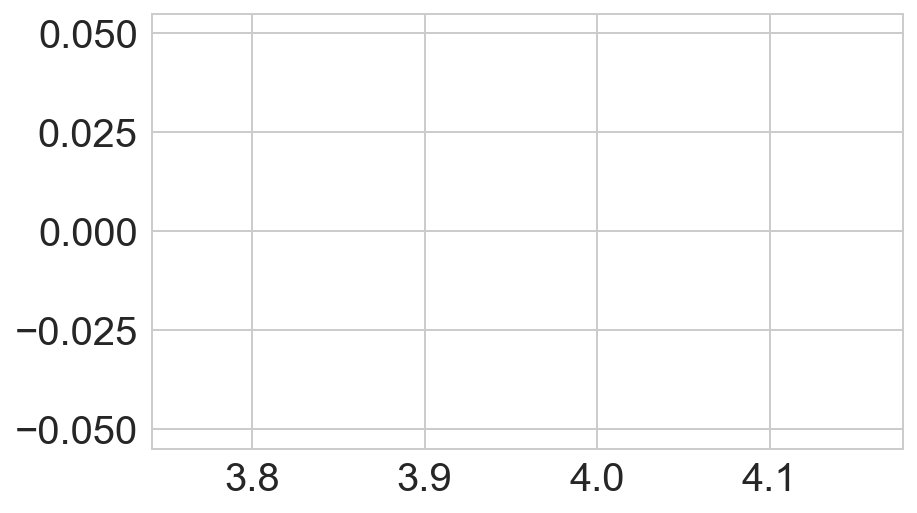

In [139]:
sns.distplot(clean_df)

In [ ]:
clean_df.shape

In [ ]:
 # Now lets save the cleaned prescribers information to Csv for further work in notebook 1.3.
# clean_df.to_csv('./inputs/prescribers_clean929.csv')